<a href="https://colab.research.google.com/github/alevsandra/Natural-language-processing/blob/main/Pjn_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Polecenie

1. Utworzyć korpus dokumentów na podstawie 5-10 książek pobranych ze strony [Wolne Lektury](https://wolnelektury.pl/)

2. Dla każdej z pozycji zwizualizować:  

  a) częstość występowania klas gramatycznych

  b) częstość występowania części mowy

3. Na podstawie korpusu zbudowanego   z 5 dowolnych książek ściągniętych ze strony Wolne Lektury wyznaczyć i zwizualizować częstość występowania rzeczowników sprowadzonych do form podstawowych.

4.  Na podstawie częstości wyznaczonych powyżej  zbudować macierz tfidf, wyłącznie w oparciu o rzeczowniki w formie podstawowej i każdą pozycję zwizualizować w postaci chmury tagów (wordcloud).

5. Podać kilka przykładów  niejednoznaczności znaczeniowej  występujacej w tekstach oraz przyjęty sposób ich rozwiązania 

6. W wybranej lekturze znaleźć 5  rzeczowników występujących w formie podmiotów oraz pokazać z jakimi czasownikami się łączą  w związku podmiotu z orzeczeniem.*



###Tworzenie korpusu

In [1]:
import urllib.request
def open_book(url):
  file = urllib.request.urlopen(url)
  file = file.read().decode('utf-8')
  return file[file.find("ISBN")+26:file.rfind("-----")]

Funkcja wykorzystująca bibliotekę <font color='gold'>***urllib***</font> w celu otworzenia plików txt ze strony internetowej. Dodatkowo funkcja przycina nieistotny początek i koniec witryny. 

In [2]:
urls = ["https://www.wolnelektury.pl/media/book/txt/brzydkie-kaczatko.txt", 
        "https://wolnelektury.pl/media/book/txt/calineczka.txt", 
        "https://wolnelektury.pl/media/book/txt/dziewczynka-z-zapalkami.txt",
        "https://wolnelektury.pl/media/book/txt/puszkin-bajka-o-rybaku-i-rybce.txt",
        "https://wolnelektury.pl/media/book/txt/pan-grubas.txt",
        "https://wolnelektury.pl/media/book/txt/lament-swietokrzyski.txt"]

corpus = []
titles = []
for url in urls:
  corpus.append(open_book(url))
  titles.append(url[url.find("/txt/")+5:url.rfind(".txt")])

Dodawanie poszczególnych książek do korpusu.

###Przygotowanie środowiska

In [3]:
!pip install spacy==2.3.0
!python -m spacy download pl_core_news_sm

!pip install morfeusz2

     |████████████████████████████████| 48.7 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_sm')


###Klasy gramatyczne i części mowy

In [4]:
import string
punctuations = list(string.punctuation)
punctuations.extend(["!…", "–", "…", "«", "»", "„", '”', "”.", ").", "—", "».", "!”"])

Lista zawierająca znaki interpunkcyjne, rozszerzona o znaki występujące w dokumentach z korpusu.

In [5]:
import spacy
nlp = spacy.load("pl_core_news_sm")

Ładowanie polskiego taggera z biblioteki <font color='gold'>***spacy***</font>.

In [6]:
def add_to(d, token):
  if token in d:
        amount = d[token]
        d[token] = amount+1
  else:
        d[token] = 1
  return d[token]

Funkcja dodająca do słownika klucz wraz z licznikiem jego wystąpienia.

In [7]:
import matplotlib.pyplot as plt

def print_out(d, all):
    for key in sorted(d, key=d.get, reverse=True):
        # print("{:<20} {:2.2%}".format(key, d[key]/all))
        d[key] = (d[key]/all)*100
    plt.bar(d.keys(), d.values())
    plt.xticks(rotation='vertical')
    plt.show()
    d.clear()

Funkcja, która wypisuje posortowany słownik i czyści go. 

brzydkie-kaczatko
Części mowy


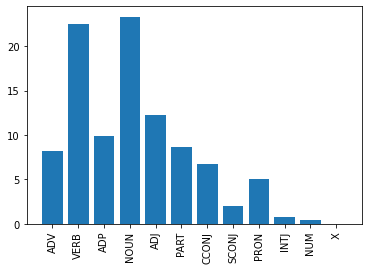


Klasy gramatyczne


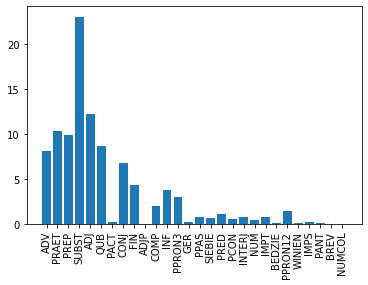




calineczka
Części mowy


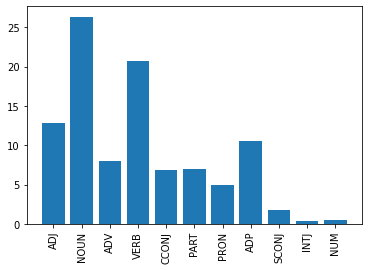


Klasy gramatyczne


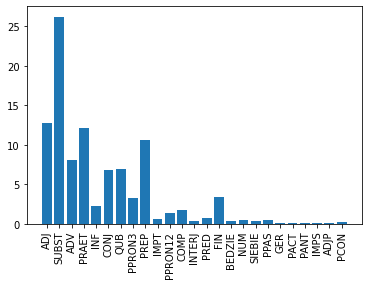




dziewczynka-z-zapalkami
Części mowy


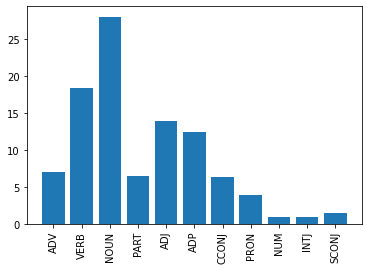


Klasy gramatyczne


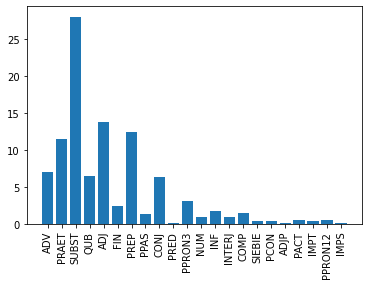




puszkin-bajka-o-rybaku-i-rybce
Części mowy


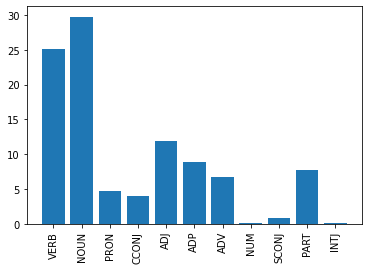


Klasy gramatyczne


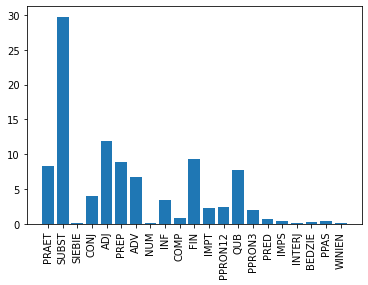




pan-grubas
Części mowy


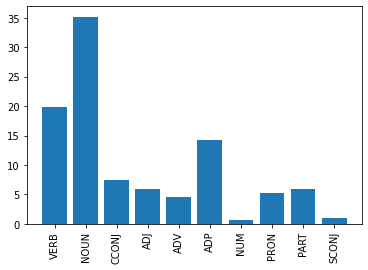


Klasy gramatyczne


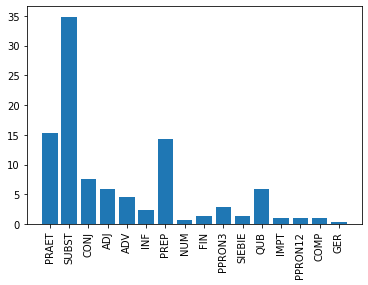




lament-swietokrzyski
Części mowy


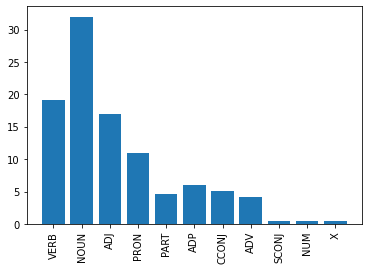


Klasy gramatyczne


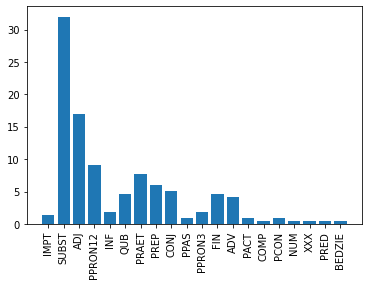

In [8]:
import pandas as pd

pos = {}
tag = {}
i = 0

for position in corpus:
  doc = nlp(position)
  all = 0
  for token in doc:
    if token.text not in punctuations and token.pos_!="SPACE":

      pos[token.pos_] = add_to(pos, token.pos_)
      tag[token.tag_] = add_to(tag, token.tag_)

      all +=1

  print("\033[1;33m" + titles[i] + "\033[0m")
  i+=1

  print("\033[1;34m" + "Części mowy" + "\033[0m")
  print_out(pos, all)

  print("\033[1;34m" + "\nKlasy gramatyczne" + "\033[0m")
  print_out(tag, all)
  print("\n\n")
  

Dla każdej pozycji mamy po dwa wykresy słupkowe przedstawiające częstość występowania klas gramatycznych oraz części mowy.

###Rzeczowniki w formie podstawowej

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def build_wordcloud(d):
  wordcloud = WordCloud(background_color ='white', min_font_size = 10).generate_from_frequencies(d)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

W oparciu o bibliotekę <font color='gold'>***matplotlib***</font> oraz <font color='gold'>***wordcloud***</font> tworzymy wordcloud.

brzydkie-kaczatko  7.89%


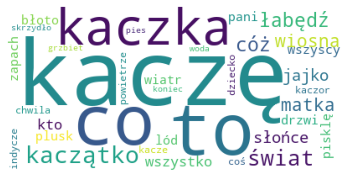



calineczka  8.58%


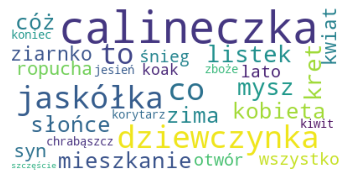



dziewczynka-z-zapalkami  9.01%


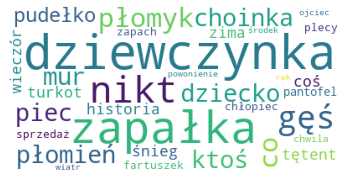



puszkin-bajka-o-rybaku-i-rybce  10.00%


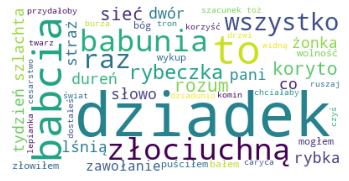



pan-grubas  14.98%


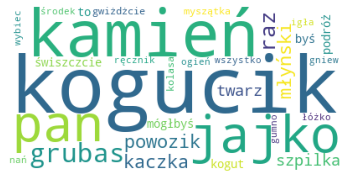



lament-swietokrzyski  15.53%


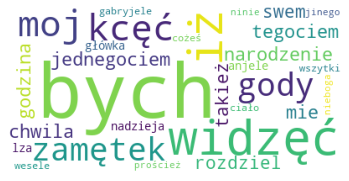

In [10]:
noun = {}
all_noun = []
i = 0
for position in corpus:
  doc = nlp(position)
  all = 0
  for token in doc:
    if token.text not in punctuations and token.pos_!="SPACE":
      all +=1
      if token.lemma_.lower() == token.text.lower() and token.tag_=="SUBST":
        noun[token.text.lower()] = add_to(noun, token.text.lower())
  
  print("\033[1;33m" + titles[i] + "\033[0m" + "  {:2.2%}".format(sum(noun.values())/all))
  i+=1

  build_wordcloud(noun)
  print("\n")

  all_noun.append(" ".join(list(noun.keys())))
  noun.clear()

Dla każdej pozycji przedstawiony jest wynik procentowy występowania rzeczowników w formie podstawowej oraz wizualizacja wordcloud tych tokenów.

####Macierz tfidf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(smooth_idf=False)
tfs = tfidf.fit_transform(all_noun)
tfs.todense()

matrix([[0.        , 0.        , 0.0936702 , ..., 0.        , 0.        ,
         0.0936702 ],
        [0.09142269, 0.        , 0.        , ..., 0.09142269, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.15368774,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.19293018, 0.        , ..., 0.        , 0.        ,
         0.        ]])

Tworzę przy użyciu biblioteki <font color='gold'>***sklearn***</font> macierz tf-idf.

###Niejednoznaczności

In [12]:
import morfeusz2
import numpy as np
import collections

token = []
morf = morfeusz2.Morfeusz()
for text in corpus:
  tagged_text = morf.analyse(text)
  counts = collections.Counter(np.array(tagged_text)[:, 0])
  tagged_mult = [text for text in tagged_text if counts[text[0]] > 1]
  for text in tagged_mult:
    if text[0] == tagged_mult[0][0]:
      if text[2][2] != tagged_mult[0][2][2]:
        print(text)
        token.append(text[2][0])
    else:
      if tagged_mult[0][2][0] in token:
        print(tagged_mult[0])
      break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


(2, 3, ('na', 'na:P', 'prep:acc', [], []))
(2, 3, ('na', 'na:P', 'prep:loc', [], []))
(2, 3, ('na', 'na:I', 'interj', [], []))
(0, 1, ('Zimno', 'Zimno', 'subst:sg:nom.acc.voc:n:ncol', ['nazwa_geograficzna'], []))
(0, 1, ('Zimno', 'zimno:S', 'subst:sg:nom.acc.voc:n:ncol', ['nazwa_pospolita'], []))
(0, 1, ('Zimno', 'zimno:D', 'adv:pos', [], []))
(0, 1, ('Była', 'była', 'subst:sg:voc:f', ['nazwa_pospolita'], []))
(0, 1, ('Była', 'być', 'praet:sg:f:imperf', [], []))
(0, 1, ('Była', 'były:A', 'adj:sg:nom.voc:f:pos', [], []))
(0, 1, ('Była', 'była', 'subst:sg:nom:f', ['nazwa_pospolita'], []))
(2, 3, ('bracia', 'brat', 'subst:pl:nom.voc:m1', ['nazwa_pospolita'], []))
(2, 3, ('bracia', 'bracia', 'subst:sg:nom:f', ['nazwa_pospolita'], ['daw.,rzad.']))


Dzięki bibliotece <font color='gold'>***morfeusz2***</font> przeanalizowałam każdy tekst. Następnie przy pomocy biblioteki <font color='gold'>***collections***</font> zliczyłam powtarzające się wyrazy - tym samym wyznaczając niejednoznaczności. [Definicje znaczników.](http://nkjp.pl/poliqarp/help/plse2.html#x3-40002.2)

####Przykład


> Słowo <font color='lightblue'>*na*</font>:
*   prep:acc -> przyimek w bierniku
*   prep:loc -> przyimek w miejsciwniku
*   interj -> wykrzyknik

> Słowo <font color='lightblue'>*Zimno*</font>:
*   subst:sg:nom.acc.voc:n:ncol - nazwa_geograficzna -> rzeczownik oznaczający nazwę własną
*   subst:sg:nom.acc.voc:n:ncol - nazwa_pospolita -> rzeczownik oznaczający chłód
*   adv:pos -> przysłówek od "zimny"

> Słowo <font color='lightblue'>*Była*</font>:
*   subst:sg:voc:f - nazwa_pospolita -> rzeczownik w wołaczu
*   praet:sg:f:imperf -> pseudoimiesłów od "być" w czasie przeszłym
*   adj:sg:nom.voc:f:pos -> przymiotnik
*   subst:sg:nom:f - nazwa_pospolita -> rzeczownik w mianowniku

> Słowo <font color='lightblue'>*bracia*</font>:
*   subst:pl:nom.voc:m1 - nazwa_pospolita -> rzeczownik w liczbie mnogiej rodzaju męskiego
*   subst:sg:nom:f - nazwa_pospolita -> rzeczownik w liczbie pojedynczej rodzaju żeńskiego, znaczenie dawne grupy

Zdania odpowiadające znaleziony słowom:
1. Prześlicznie było na wsi.
2. Zimno było, śnieg padał, ściemniało się coraz bardziej, wieczór się zbliżał.
3. Była raz kurka i był raz kogucik, które chciały razem odbyć pewną podróż.
4. Posłuchajcie, bracia miła.

In [28]:
from spacy import displacy

zdania = ["Prześlicznie było na wsi.",
          "Zimno było, śnieg padał, ściemniało się coraz bardziej, wieczór się zbliżał.",
          "Była raz kurka i był raz kogucik, które chciały razem odbyć pewną podróż.",
          "Posłuchajcie, bracia miła."]

for zdanie in zdania:
  doc = nlp(zdanie)
  displacy.render(doc, jupyter = True, options = {"distance": 100})

Rozwiązanie jakie przyjmuję to porównanie znaczeń do kontekstu wypowiedzi. Znalazłam do każdego wyrazu zdanie z tekstu i narysowałam drzewo zależności dla każdego z nich. Dzięki temu widać, które znaczenie przyjmuje dane słowo. [Definicje znaczników](https://universaldependencies.org/u/pos/)

Słowo <font color='lightblue'>*na*</font> -> ADP -> przyimek ("wsi" w bierniku)

Słowo <font color='lightblue'>*Zimno*</font> -> ADV -> przysłówek 

Słowo <font color='lightblue'>*Była*</font> -> VERB -> czasownik, w tym wypadku pseudoimiesłów

Słowo <font color='lightblue'>*bracia*</font> -> NOUN -> rzeczownik, rodzaj żeński ze względu na przymiotnik określający "miła" 

###Rzeczowniki w formie podmiotów

In [99]:
subst = []
doc = nlp(corpus[0])
for token in doc:
    if token.dep_=="ROOT" and token.pos_=="VERB":
      start_i = corpus[0].split(token.text)[0].rfind(".")
      if start_i == -1: 
        start_i = 0
      end_i = corpus[0].split(token.text)[1].find(".") + len(corpus[0].split(token.text)[0]) + len(token.text)
      sentence = nlp(corpus[0][start_i+2:end_i])
      for char in sentence:
        if char.pos_=="NOUN" and char.dep_=="nsubj":
          if len(subst) < 5:
            subst.append(char.text + " " + token.text)
          else:
            break
    if len(subst) == 5:
      break
print(subst)

['Prześlicznie było', 'słońce oświetlało', 'rośliny zwieszały', 'liście zwieszały', 'łopianu zwieszały']


Wyszukuje w korpusie ROOT zdań będące jednocześnie czasownikami oraz wyciągam z tekstu całe zdanie zawierające to orzeczenie. Nastęnie wyszukuje rzeczowniki powiązane ze znalezionym czasownikiem. Metoda nie jest w 100% skuteczna.